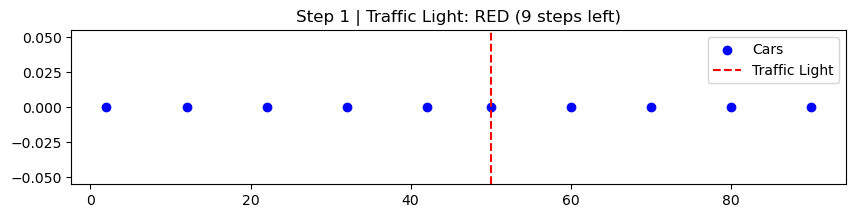

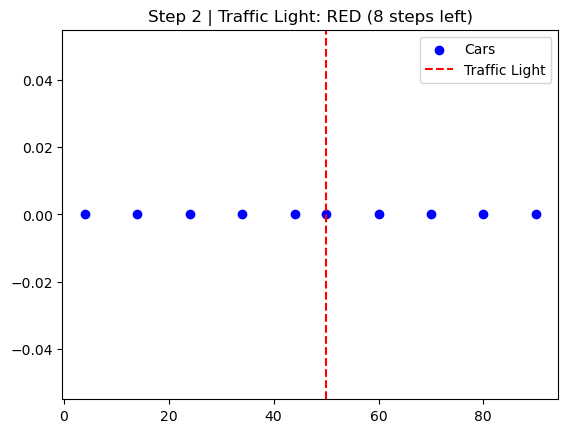

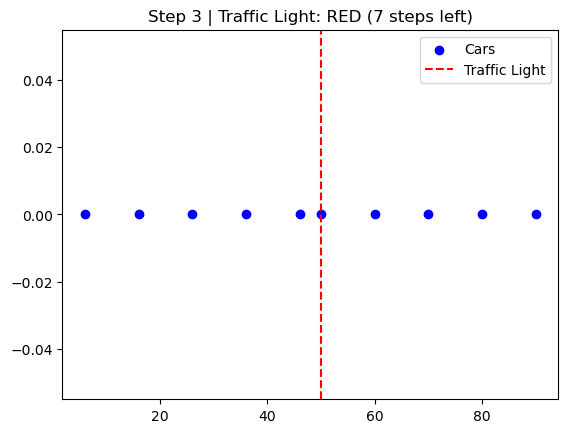

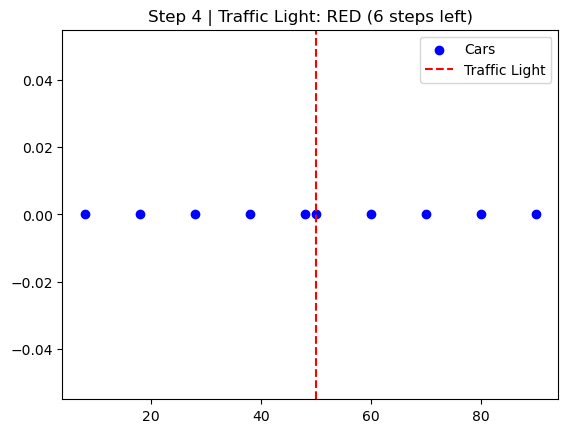

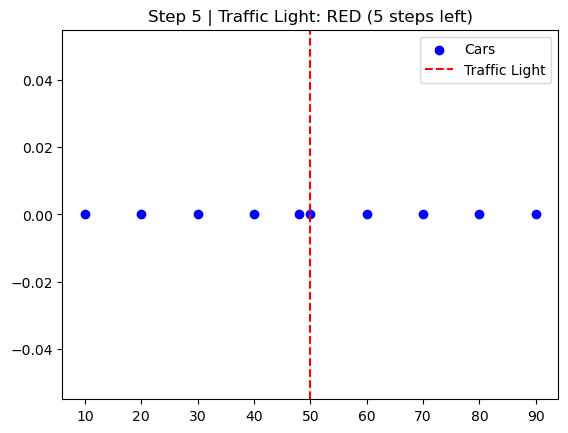

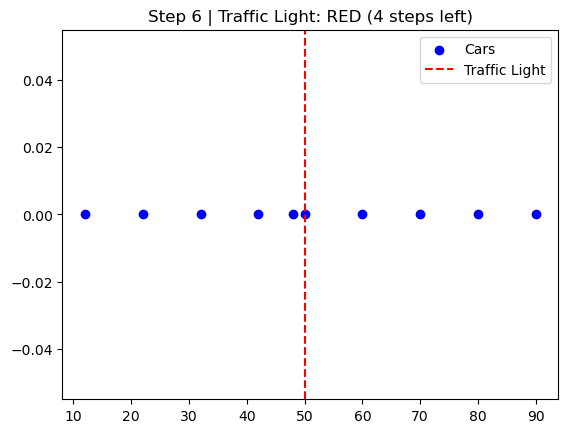

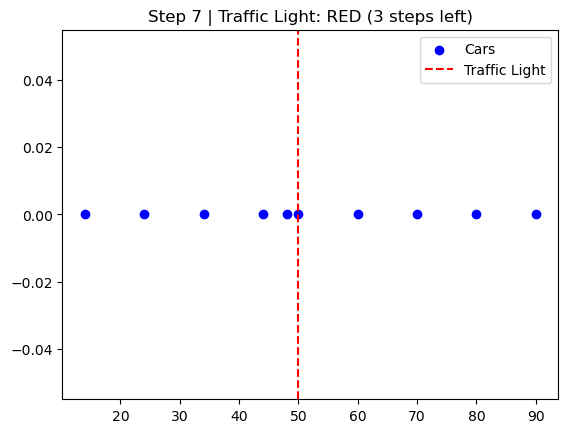

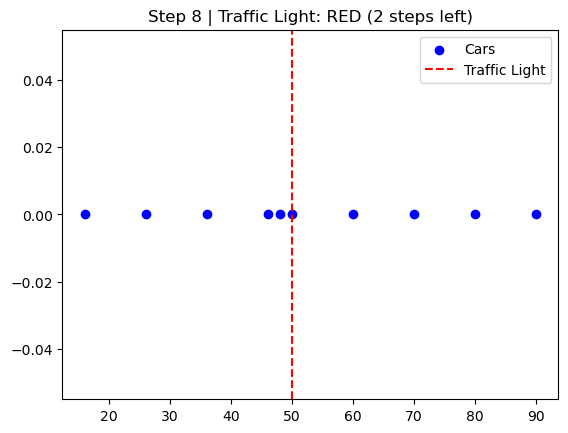

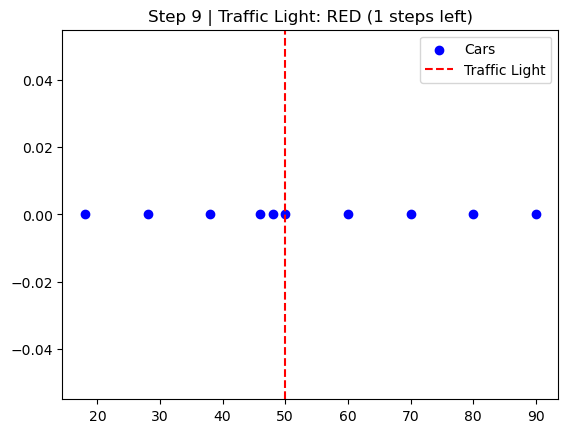

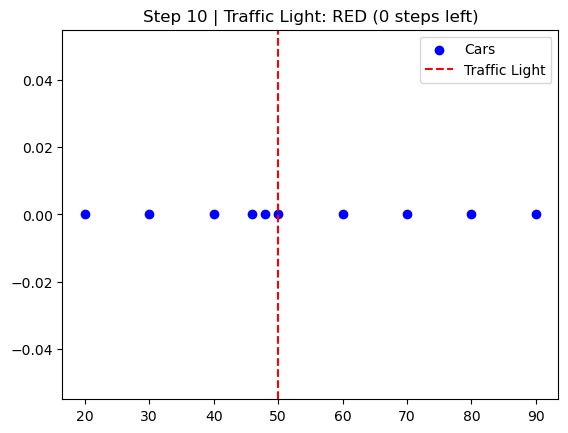

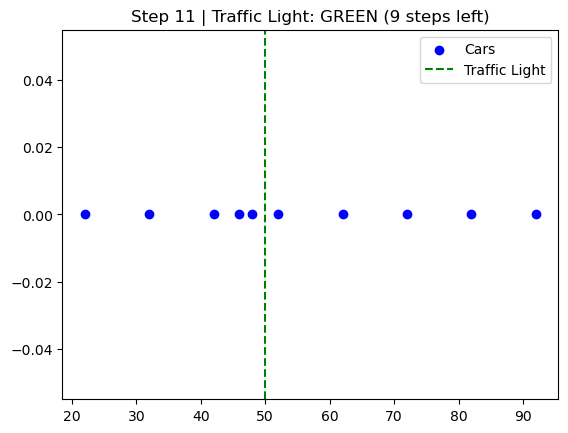

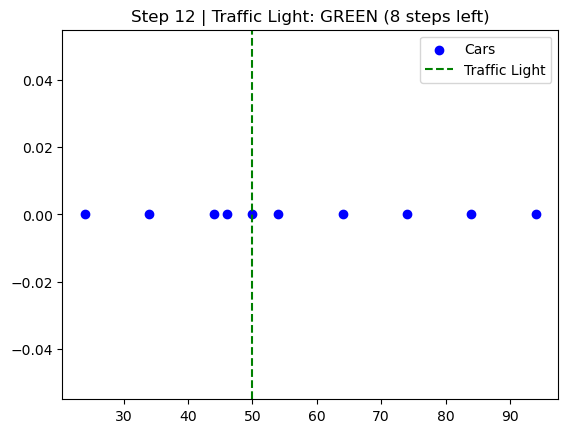

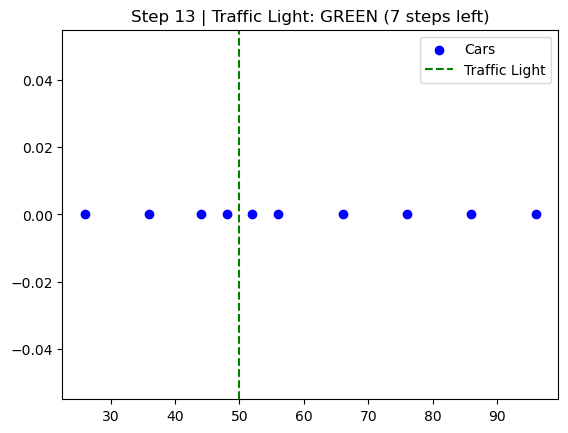

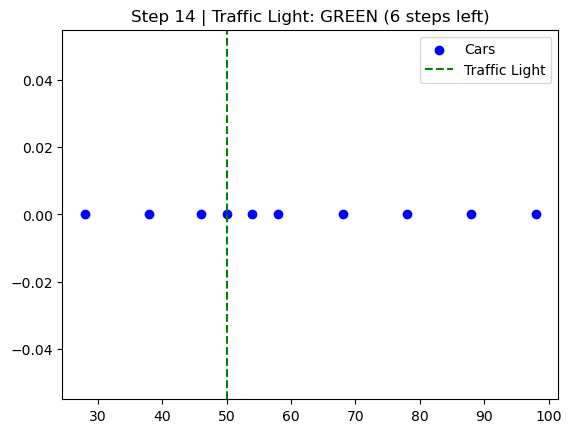

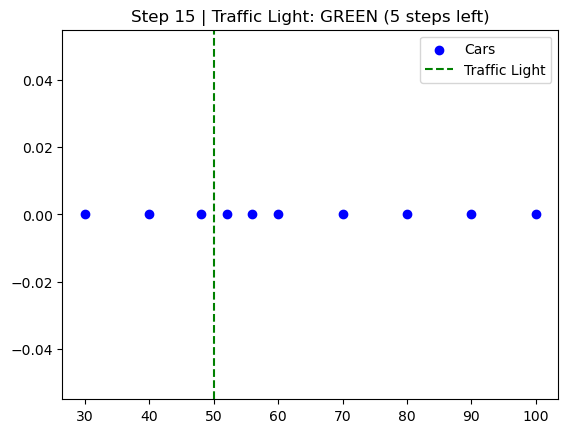

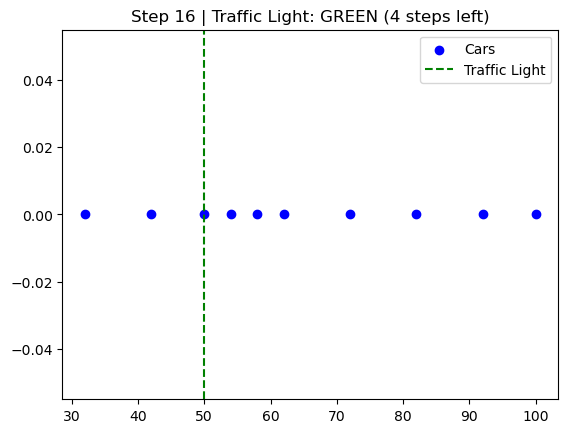

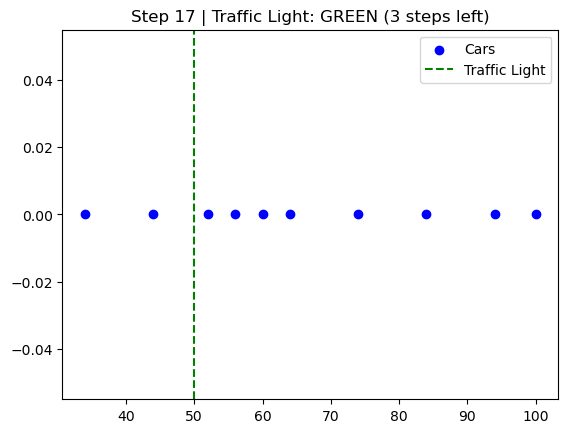

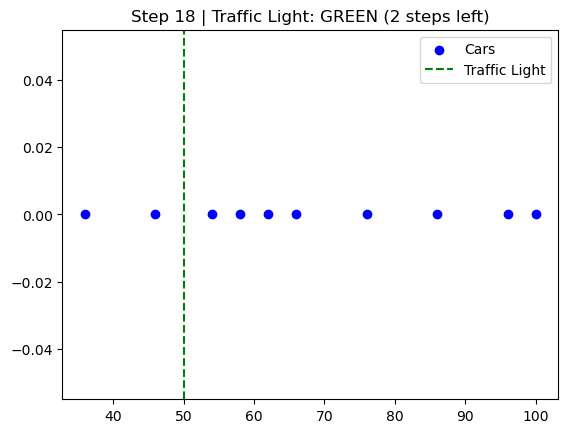

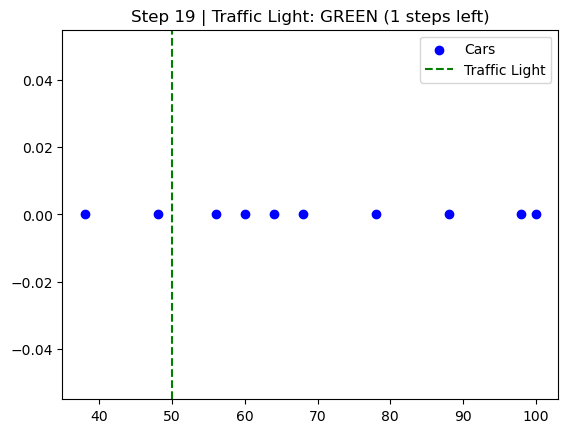

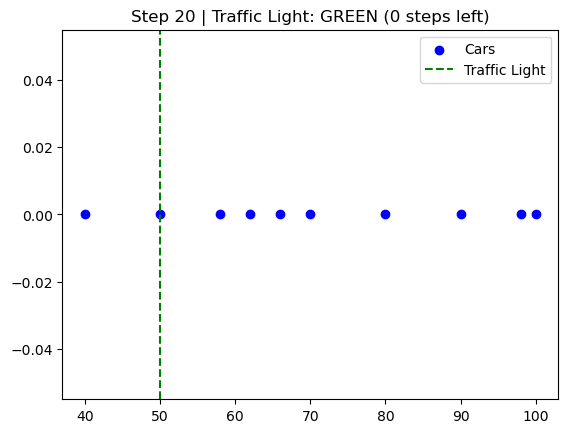

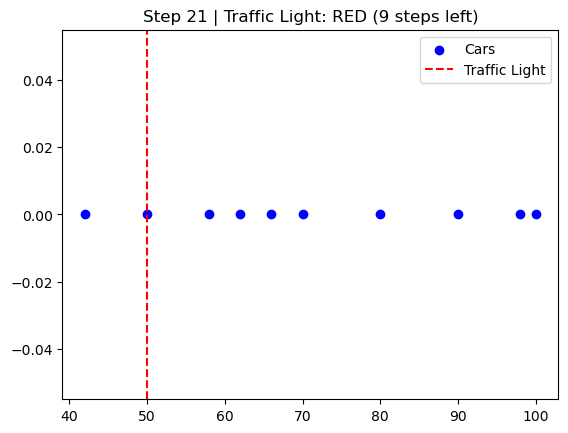

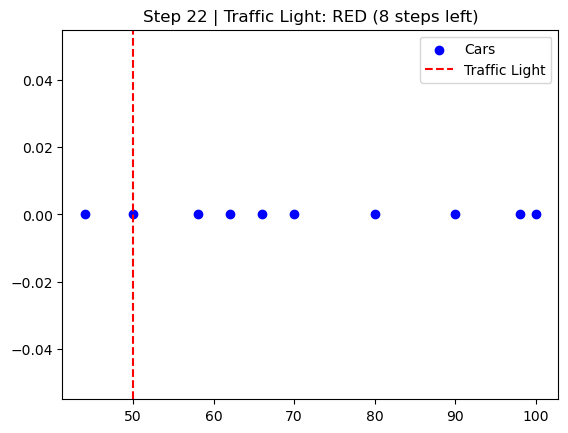

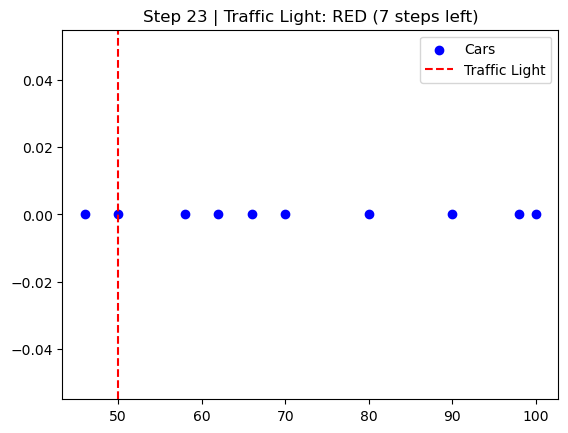

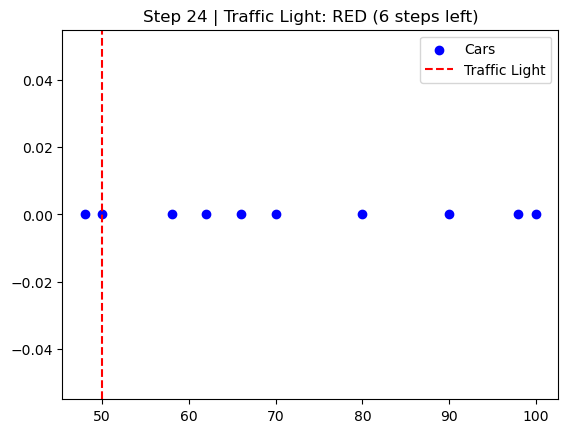

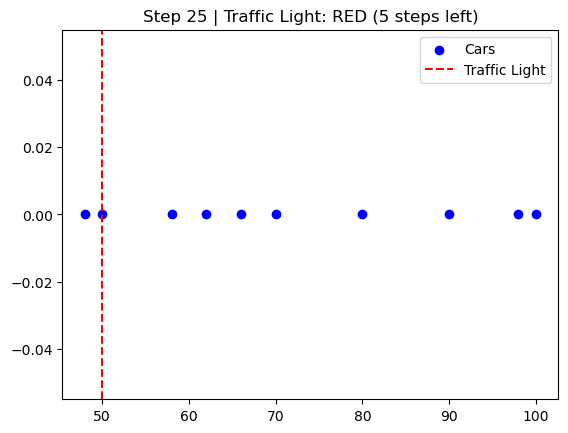

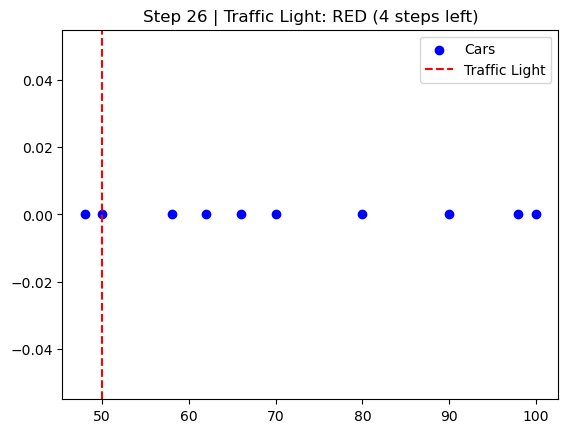

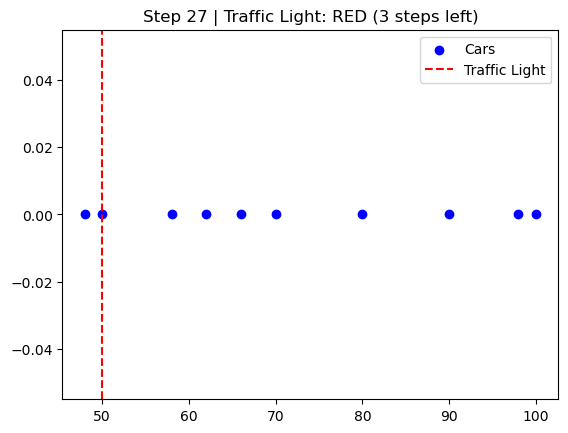

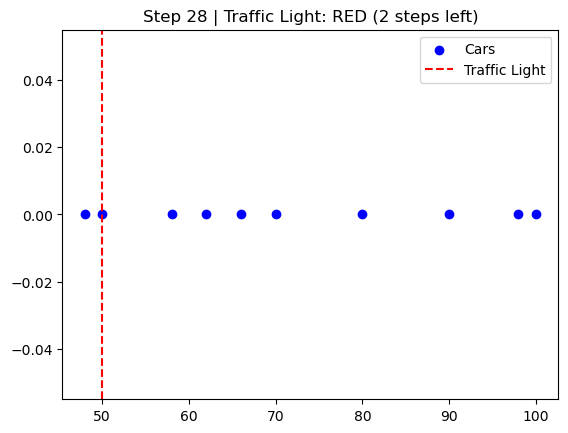

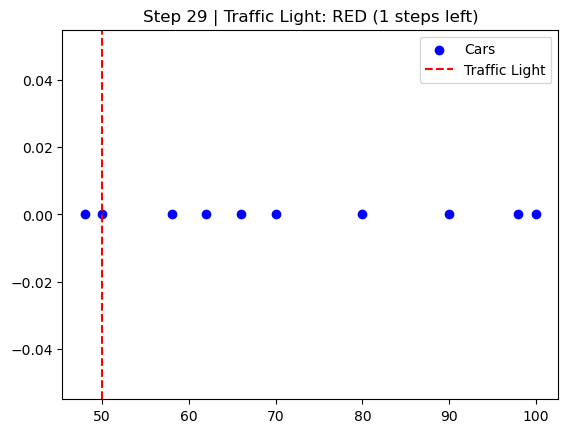

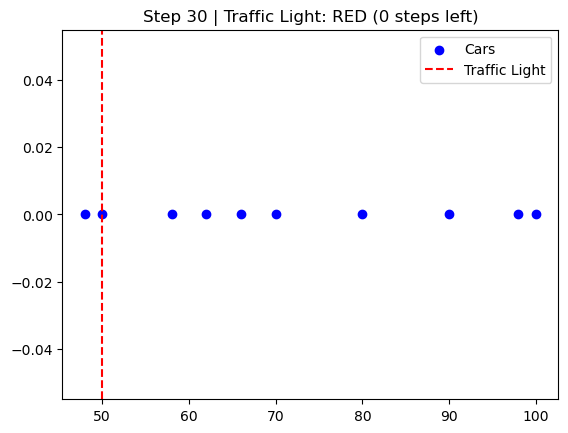

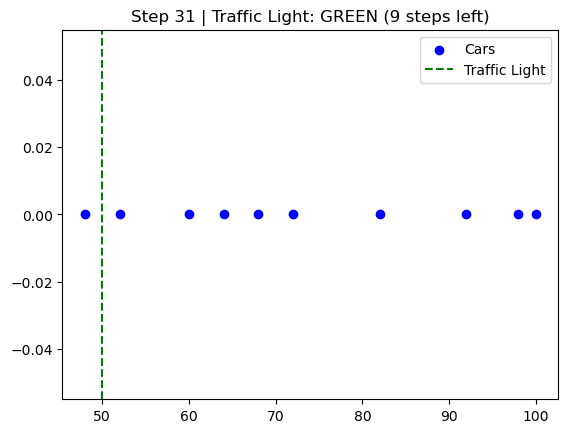

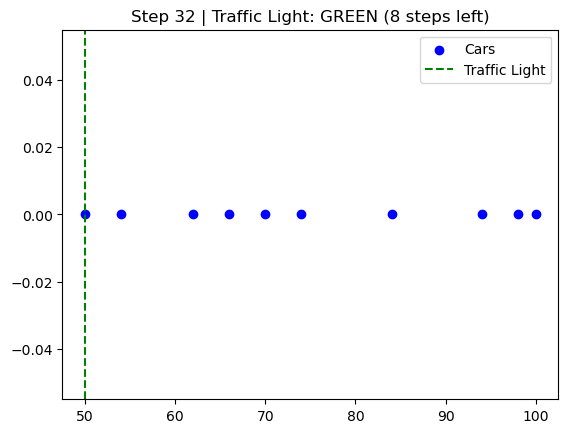

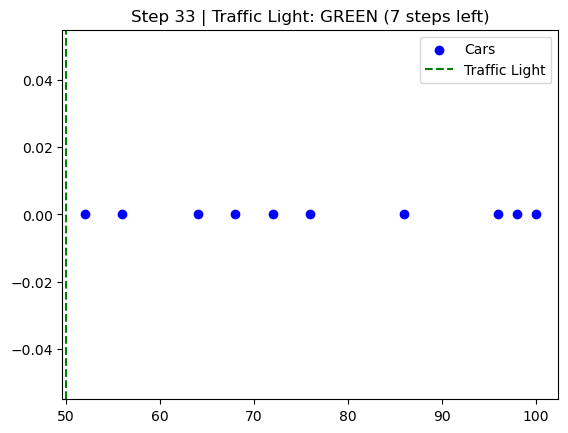

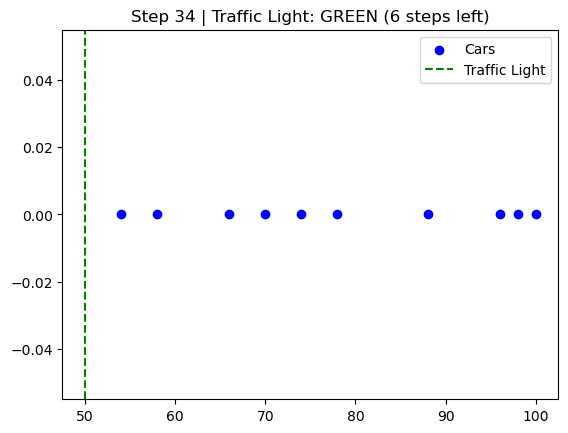

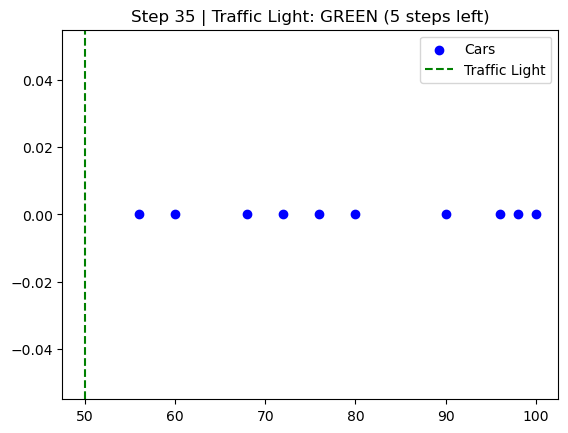

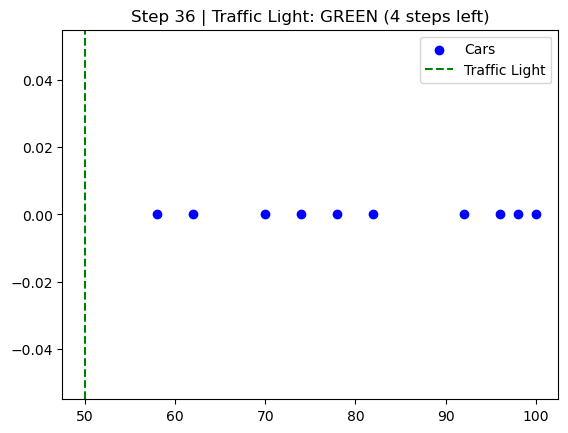

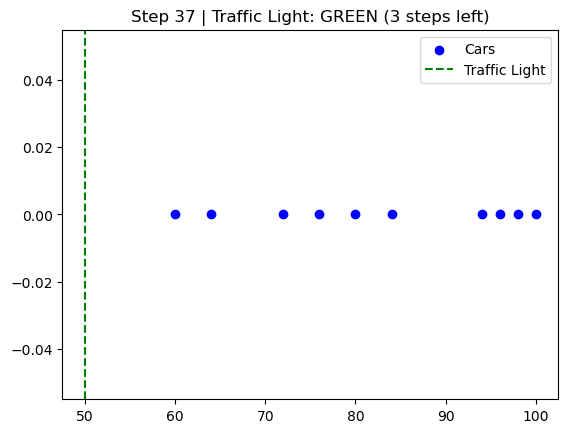

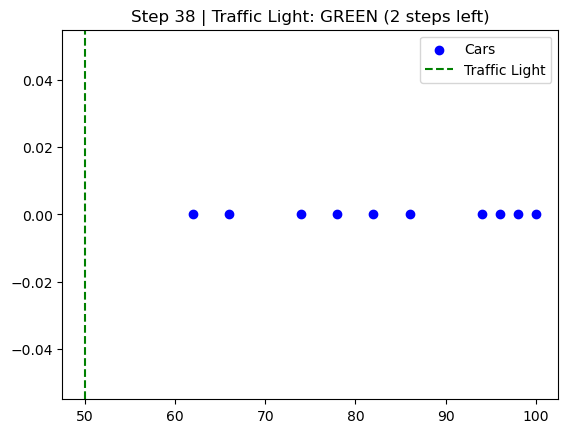

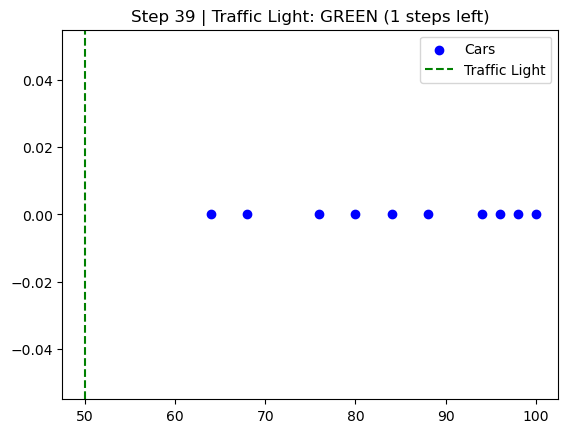

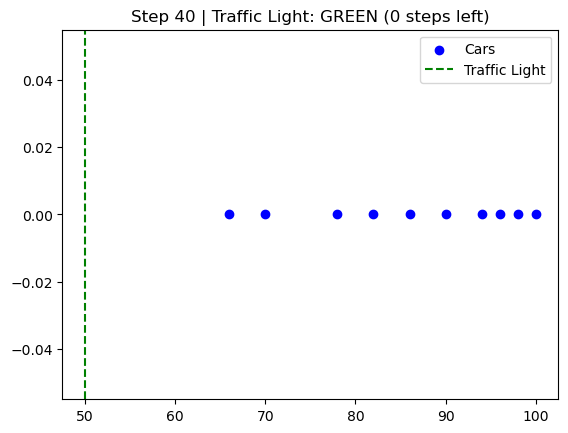

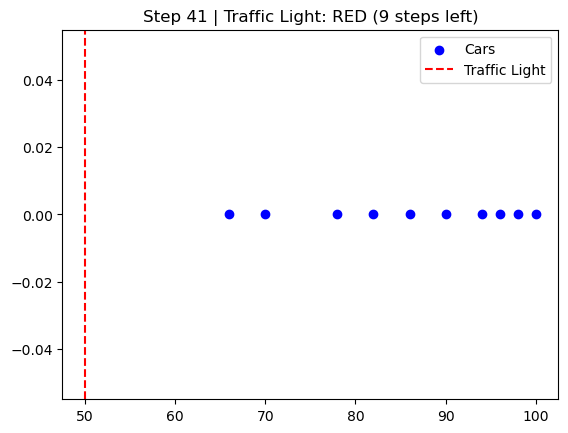

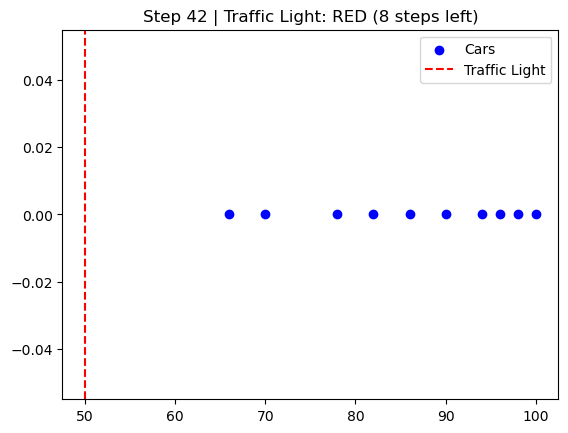

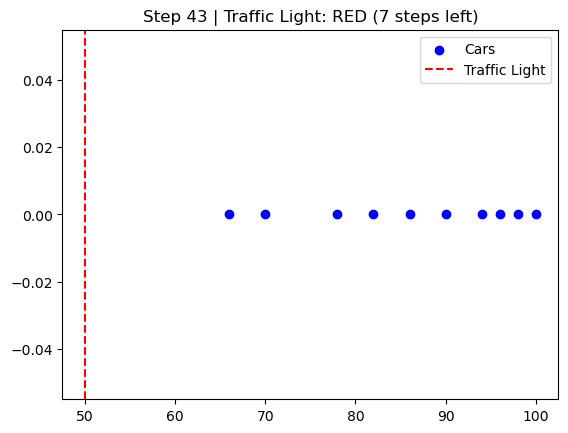

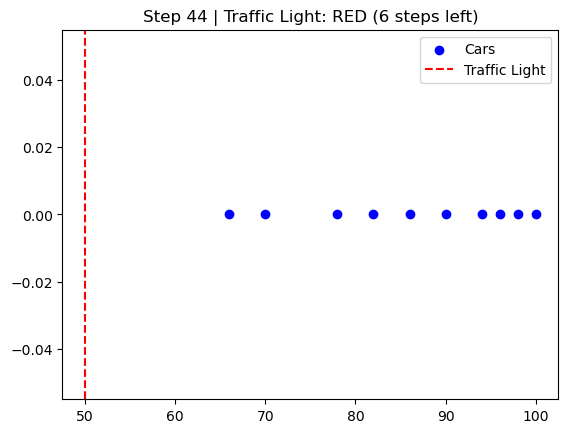

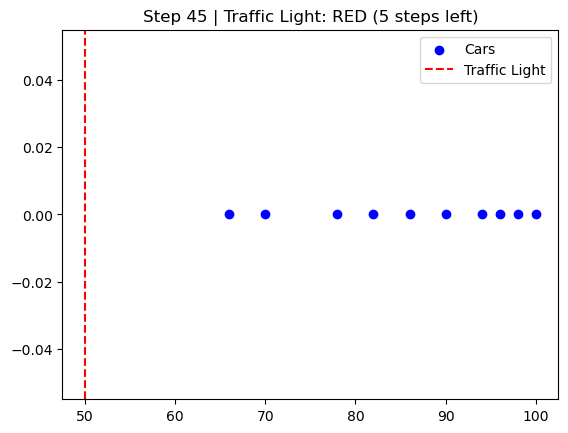

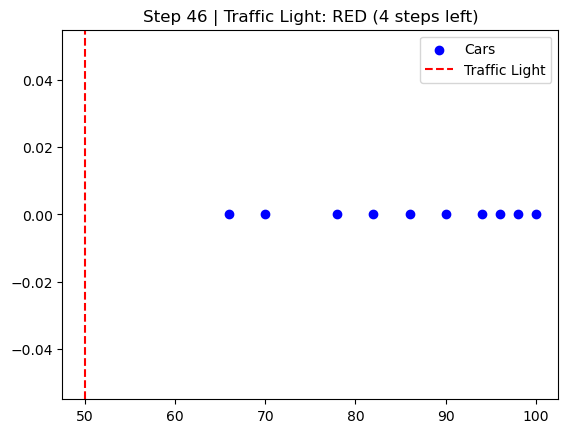

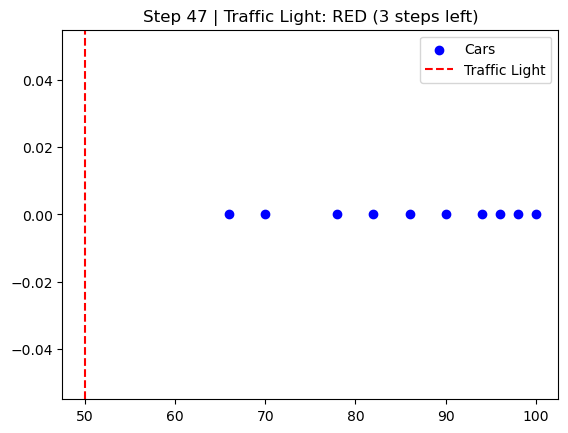

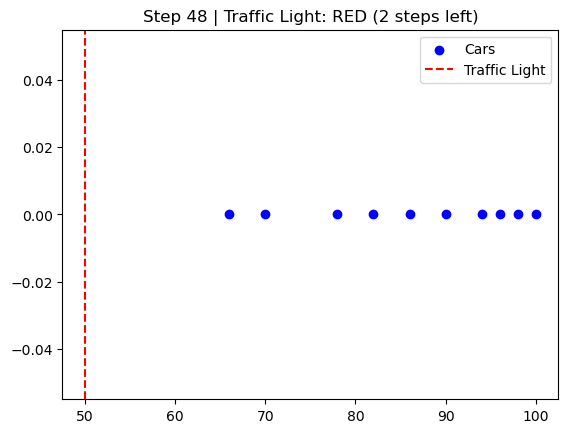

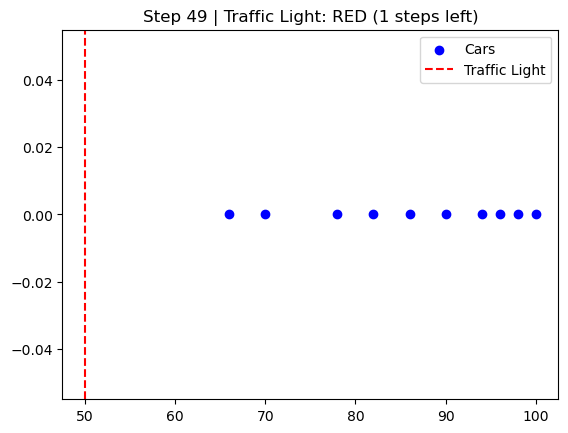

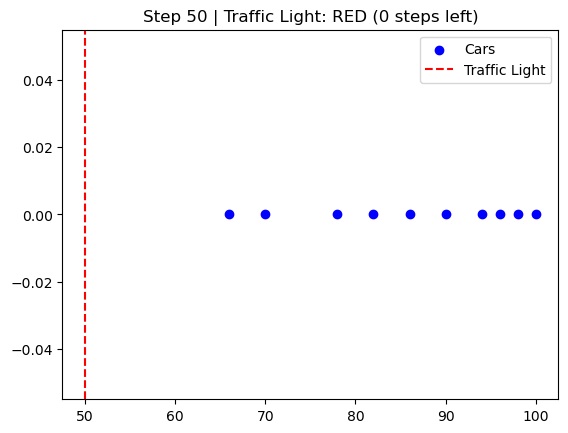

In [1]:
import matplotlib.pyplot as plt
import time

# Simulation Parameters
road_length = 100          # Length of the road
num_cars = 10              # Number of cars
traffic_light_pos = 50     # Position of the traffic light
traffic_light_duration = 10 # Number of steps the light stays red
safe_distance = 2          # Minimum distance between cars
car_speed = 2              # Speed of each car (units per step)
num_steps = 50             # Number of simulation steps

# Initialize car positions (evenly spaced at the start)
car_positions = [i * (road_length // num_cars) for i in range(num_cars)]

# Traffic light state
light_state = "red"  # Start with a red light
light_timer = traffic_light_duration

# Visualization setup
plt.figure(figsize=(10, 2))
plt.ylim(-1, 1)
plt.xlim(0, road_length)

# Simulation loop
for step in range(num_steps):
    # Update traffic light state
    if light_timer == 0:
        light_state = "green" if light_state == "red" else "red"
        light_timer = traffic_light_duration
    light_timer -= 1

    # Move cars
    for i in range(num_cars):
        # Check if the car is at the traffic light and it is red
        if light_state == "red" and car_positions[i] + car_speed >= traffic_light_pos:
            continue  # Stop the car at the light

        # Check the distance to the next car
        if i < num_cars - 1 and car_positions[i + 1] - car_positions[i] <= safe_distance:
            continue  # Stop the car to maintain safe distance

        # Move the car forward
        car_positions[i] = min(car_positions[i] + car_speed, road_length)

    # Visualization
    plt.clf()
    plt.title(f"Step {step + 1} | Traffic Light: {light_state.upper()} ({light_timer} steps left)")
    plt.scatter(car_positions, [0] * num_cars, color="blue", label="Cars")
    plt.axvline(traffic_light_pos, color="red" if light_state == "red" else "green", linestyle="--", label="Traffic Light")
    plt.legend()
    plt.pause(0.5)  # Pause for visualization

# Finalize
plt.show()
